## Fruit Image Classification
### data source: https://www.kaggle.com/moltean/fruits

In [1]:
import time
start = time.time()

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import tensorflow 
import keras
import h5py

Using TensorFlow backend.


### multiclass classification 
#### four fruits selected for mini dataset

In [3]:
from sklearn.datasets import load_files

In [4]:
def load_dataset(path):
    data=load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [5]:
X_train, y_train, target_labels = load_dataset('fruits-360/Training_mini')

In [6]:
print('training data loaded')

training data loaded


In [7]:
X_test, y_test, _ = load_dataset('fruits-360/Test_mini')

In [8]:
print('test data loaded')

test data loaded


In [9]:
print('Training set:', X_train.shape[0])
print('Test set:', X_test.shape[0])

Training set: 2147
Test set: 719


In [10]:
n_class=len(np.unique(y_train))

In [11]:
print('number of categories: ', n_class)

number of categories:  4


In [12]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train, n_class)
y_test=np_utils.to_categorical(y_test, n_class)

In [13]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [14]:
def convert_to_array(pics):
    img_arr =[]
    for pic in pics:
        img_arr.append(img_to_array(load_img(pic)))
    return img_arr

In [15]:
X_train = np.array(convert_to_array(X_train))
X_test = np.array(convert_to_array(X_test))

In [16]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [17]:
print('data reshaped')
print('sample shape for model input: ',X_train[0].shape)

data reshaped
sample shape for model input:  (100, 100, 3)


In [18]:
#import all the pieces of the neural network
from keras.models import Sequential, Model#the model
from keras.layers import Dense, Dropout, Activation, Flatten, Input #fully connected layers
from keras.layers import Convolution2D, MaxPooling2D #the convnet
from keras.utils import np_utils #extra tools
from keras.callbacks import ModelCheckpoint

In [19]:
# filepath="weights_best"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [20]:
# from keras.callbacks import History #may want to print history if set verbose to 0
# history = History()

In [21]:
# load the weights that yielded the best validation accuracy
#model.load_weights('cnn_test.hdf5')

In [22]:
print('running Keras CNN model')

running Keras CNN model


In [23]:
#THE MODEL#
batch_size = 32
nb_classes = n_class
nb_epoch = 2

img_rows =100
img_cols=100
img_channels = 3

model_input=Input(shape=(img_rows, img_cols,img_channels))

x = Convolution2D(32, 3, 3, border_mode='same')(model_input)
x = Activation('relu')(x)
x = Convolution2D(32, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
conv_out = Flatten()(x)

x1 = Dense(nb_classes, activation='softmax')(conv_out)

lst = [x1]

#model = Model(input=model_input, output=lst)
model = Model(input=model_input, output=lst) 

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)
#set verbose to 0 if you run many, 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
2147/2147 [==============================] - 16s 7ms/step - loss: 0.2274 - accuracy: 0.9371
Epoch 2/2
2147/2147 [==============================] - 10s 5ms/step - loss: 3.2013e-04 - accuracy: 1.0000


In [24]:
y_pred = model.predict(X_test)

In [25]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9888734221458435


In [26]:
end = time.time()
print("total runtime: ",(end - start))

total runtime(m):  0.7864654342333476


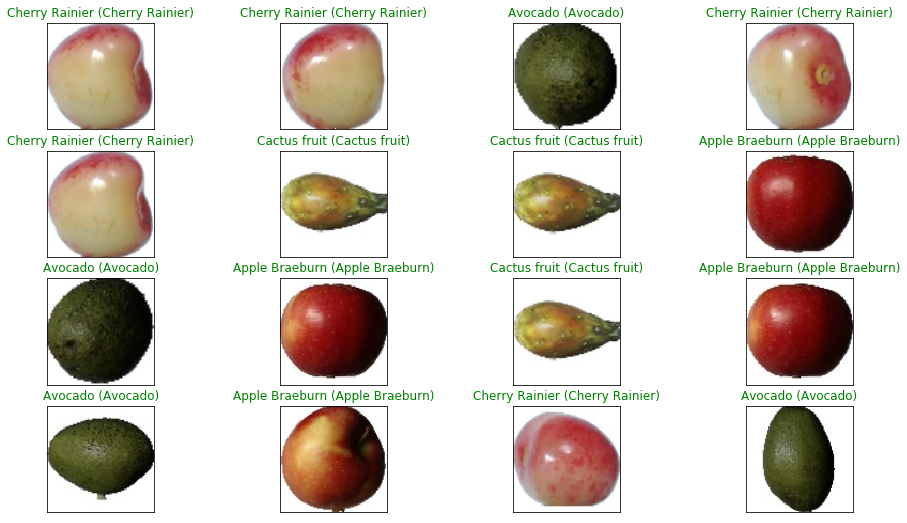

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))